<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Datasets_Crenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib.pyplot import *
from google.colab import drive
import seaborn as sb

drive.mount('/content/drive');

covid_cases_argentina_csv = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/CasosCovidArgentina.xlsx")
covid_cases_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid.csv")
diabetes_cases_csv = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/diabetes_dataset__2019.xlsx")       

Mounted at /content/drive


---
## **Casos de Covid-19 Argentina**
Este dataset es el más masivo de los tres, contiene 25 columnas y mas de 20 millones de filas.
Las variables más interesantes que me parece analizar son el rango etario de mortalidad, las provinvias más afectadas, como afectó a los diferentes sexos y como afectó a los sexos en relación a la edad.

In [ ]:
covid_cases_argentina_csv.tail(5)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
999995,10964856,M,1.0,Años,Argentina,Santa Fe,Rosario,Santa Fe,NaT,2021-04-22,...,NaT,NO,82,Público,Caso Descartado,Descartado,82,2021-04-21,84,2022-06-05
999996,10964857,F,63.0,Años,Argentina,Santa Cruz,Güer Aike,Santa Cruz,NaT,2021-04-22,...,NaT,NO,78,Público,Caso Descartado,Descartado,78,2021-04-18,21,2022-06-05
999997,10964858,M,50.0,Años,Argentina,Tierra del Fuego,Ushuaia,Tierra del Fuego,NaT,2021-04-22,...,NaT,NO,94,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,94,2021-04-21,14,2022-06-05
999998,10964859,F,71.0,Años,Argentina,Neuquén,Zapala,Neuquén,2021-04-18,2021-04-22,...,2021-05-30,SI,58,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,58,2021-05-05,112,2022-06-05
999999,1096486,M,30.0,Años,Argentina,Tucumán,Capital,Tucumán,NaT,2020-06-17,...,NaT,NO,90,Público,Caso Descartado,Descartado,90,2020-06-19,84,2022-06-05


Como podemos ver el rango etario de mayor mortalidad está situado entre los 25 y 35 años. ademas los quartiles nos permiten ver los rangos de edad mas y menos afectados por el covid.


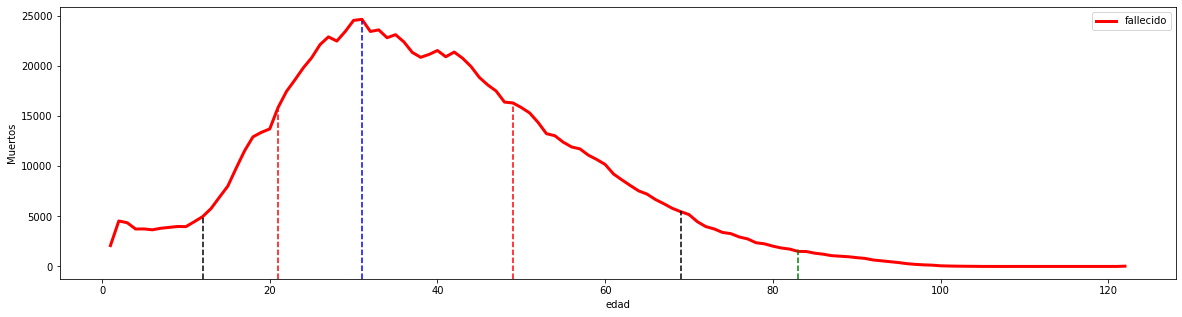

In [ ]:
ages = covid_cases_argentina_csv[["edad", "fallecido"]]
ages = ages.drop(ages[ages.edad > 150].index).dropna()
ages = ages.drop(ages[ages.fallecido == "SI"].index)
#ages = ages.groupby(["edad", "sexo"]).count()  Hay muchos datos del tipo sexo no reconocido
ages = ages.groupby(["edad"]).count()

# Lineas verticales de los quartiles en listas
q25 = ages.loc[abs(ages["fallecido"] - ages["fallecido"].quantile(.25)) <= 500].reset_index().head(2)["edad"].to_list()
q50 = ages.loc[abs(ages["fallecido"] - ages["fallecido"].quantile(.5)) <= 500].reset_index().head(2)["edad"].to_list()
q75 = ages.loc[abs(ages["fallecido"] - ages["fallecido"].quantile(.75)) <= 500].reset_index().head(2)["edad"].to_list()

ages_plot = ages.plot.line(figsize=(20, 5), ylabel="Muertos", color="r", lw=3)
ages_plot.axvline(ages["fallecido"].idxmax(), color="blue", linestyle="--", ymax = .95)
ages_plot.axvline(q25[0], color="green", linestyle="--", ymax = .11)
ages_plot.axvline(q50[0], color="black", linestyle="--", ymax = .23)
ages_plot.axvline(q50[1], color="black", linestyle="--", ymax = .25)
ages_plot.axvline(q75[0], color="red", linestyle="--", ymax = .62)
ages_plot.axvline(q75[1], color="red", linestyle="--", ymax = .65)

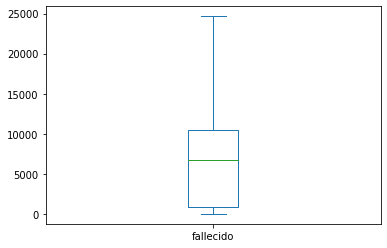

In [ ]:
quantiles = ages.describe()
quantiles.plot.box();

---
## **Casos de covid periodo 2020**  
Este datasets tiene solamente 183 filas, las cuales representan los países de dónde fueron extraídos los datos.
En este datasets hay un montón de datos interensantes. En mi opinion las variable que rescato son las muertes cada 100 casos, los recuperados cada 100 casos y los muertos cada 100 recuperados.

In [ ]:
covid_cases_csv.head(5).sort_values("Confirmed")

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean


Ahora ordenaremos los países de mayor a menor para ver las muertes por covid cada 100 casos. y graficaremos de mayor a menor los países en relación a la cantidad de muertes cada 100 casos.

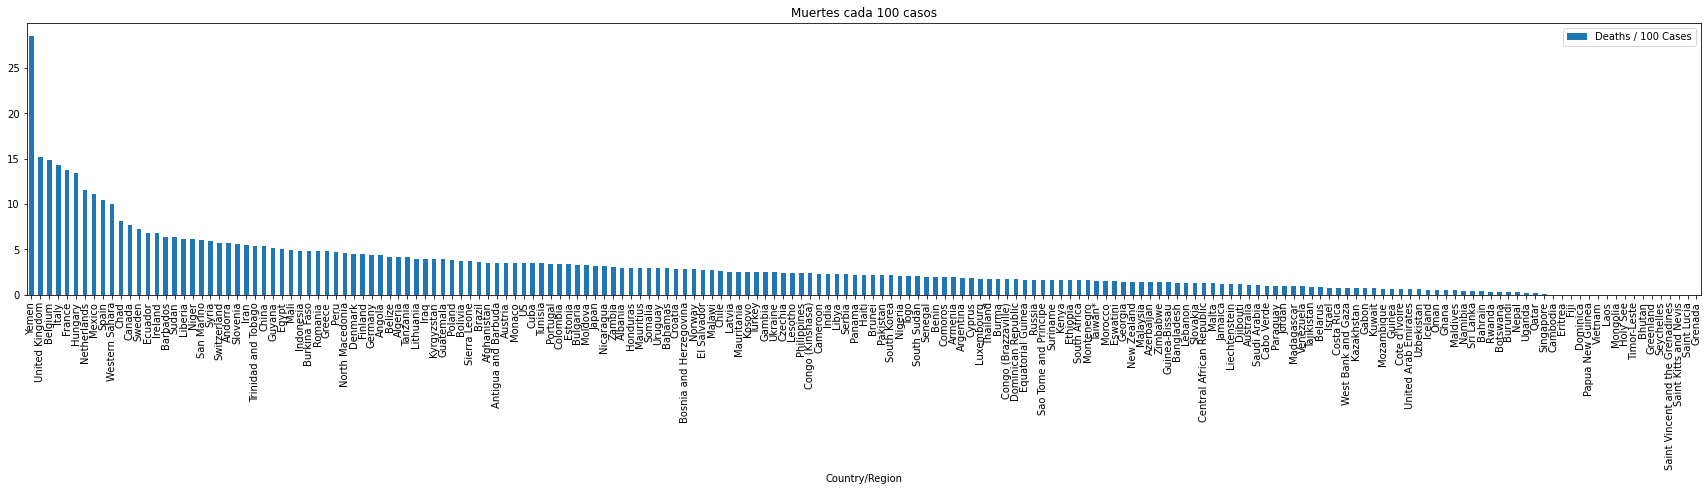

In [ ]:
covid_cases_csv.sort_values("Deaths / 100 Cases", ascending = False, inplace=True)
countries = covid_cases_csv["Country/Region"]
covid_cases_csv[["Country/Region", "Deaths / 100 Cases"]].set_index(countries).plot.bar(figsize=(30, 5), title="Muertes cada 100 casos");

---
## **Casos de diabetes en 2019**
Existen en mi opinión tres variables interesantes, estas son: la diabete por rango de edad, por sexo y según si en si familia han habido casos anteriores de diabetes.
Abajo se ven representados en gráficos de torta el porcentaje de mujeres y hombres con casos de diabetes en la familia. La diabetes por sexo. Y la suma de personas con diabetes por rango de edad en gráfico de barras.

In [ ]:
diabetes_cases_csv.head(5)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much


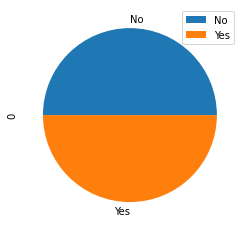

In [ ]:
familiar_diabetes = diabetes_cases_csv[["Family_Diabetes", "Gender"]]
familiar_diabetes.dropna()
no_percent = len(familiar_diabetes[familiar_diabetes == "no"]) * 100 / len(familiar_diabetes)
yes_percent = len(familiar_diabetes[familiar_diabetes == "yes"]) * 100 / len(familiar_diabetes)
pd.DataFrame([no_percent, yes_percent], index=['No', 'Yes']).plot.pie(figsize=(4, 4), subplots=True);

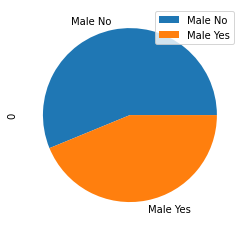

In [ ]:
male_no_percent = len(familiar_diabetes[(familiar_diabetes["Family_Diabetes"] == "no") & (familiar_diabetes["Gender"] == "Male")]) * 100 / len(familiar_diabetes)
male_yes_percent = len(familiar_diabetes[(familiar_diabetes["Family_Diabetes"] == "yes") & (familiar_diabetes["Gender"] == "Male")]) * 100 / len(familiar_diabetes)
pd.DataFrame([male_no_percent, male_yes_percent], index=['Male No', 'Male Yes']).plot.pie(figsize=(4, 4), subplots=True);

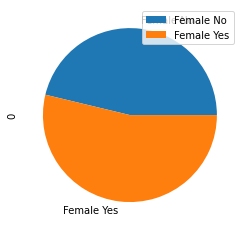

In [ ]:
female_no_percent = len(familiar_diabetes[(familiar_diabetes["Family_Diabetes"] == "no") & (familiar_diabetes["Gender"] == "Female")]) * 100 / len(familiar_diabetes)
female_yes_percent = len(familiar_diabetes[(familiar_diabetes["Family_Diabetes"] == "yes") & (familiar_diabetes["Gender"] == "Female")]) * 100 / len(familiar_diabetes)
pd.DataFrame([female_no_percent, female_yes_percent], index=['Female No', 'Female Yes']).plot.pie(figsize=(4, 4), subplots=True);

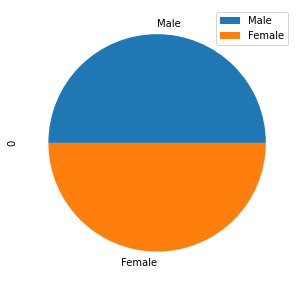

In [ ]:
diabetes_by_sex = diabetes_cases_csv["Gender"]
diabetes_by_sex.dropna()
Male_percent = len(familiar_diabetes[diabetes_by_sex == "Male"]) * 100 / len(diabetes_by_sex)
Female_percent = len(familiar_diabetes[diabetes_by_sex == "Female"]) * 100 / len(diabetes_by_sex)

pd.DataFrame([no_percent, yes_percent], index=['Male', 'Female']).plot.pie(figsize=(5, 5), subplots=True);

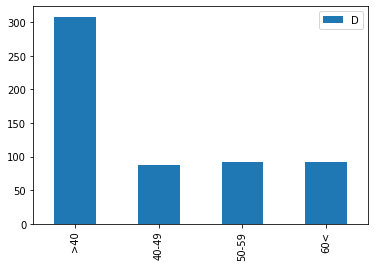

In [ ]:
hist = diabetes_cases_csv[["Gender", "Age"]]
sum_less_40 = len(hist[(hist["Gender"] == "Male") & (hist["Age"] == "less than 40")])
sum_40_49 = len(hist[(hist["Gender"] == "Male") & (hist["Age"] == "40-49")])
sum_50_59 = len(hist[(hist["Gender"] == "Male") & (hist["Age"] == "50-59")])
sum_older_60 = len(hist[(hist["Gender"] == "Male") & (hist["Age"] == "60 or older")])

plot_bar = pd.DataFrame([sum_less_40, sum_40_49, sum_50_59, sum_older_60], index = [">40", "40-49", "50-59", "60<"]).plot.bar();
plot_bar.legend('Diabetes por edad (Hombres)');